In [1]:
## struct0 is the CNN structure used by the paper.
## dataset100sr_10tau is the dataset used.

In [2]:
# Import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics, preprocessing
from google.colab import drive

In [3]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_directory = "/content/drive/My Drive/dataset_100sr_10tau"
chart_title = "PQD CNN - struct0 - dataset100sr_10tau"
model_title = "pqd_cnn_struct0_dataset100sr_10tau_model.h5"

In [5]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/training_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 6000 files belonging to 10 classes.


In [6]:
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/validation_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 2000 files belonging to 10 classes.


In [7]:
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/testing_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 2000 files belonging to 10 classes.


In [8]:
# Build the CNN model - struct0
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [9]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [10]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
188/188 [==============================] - 910s 5s/step - loss: 6.4910 - accuracy: 0.8682 - val_loss: 0.0865 - val_accuracy: 0.9655
Epoch 2/10
188/188 [==============================] - 13s 69ms/step - loss: 0.1228 - accuracy: 0.9613 - val_loss: 0.0721 - val_accuracy: 0.9735
Epoch 3/10
188/188 [==============================] - 13s 69ms/step - loss: 0.0746 - accuracy: 0.9740 - val_loss: 0.0672 - val_accuracy: 0.9745
Epoch 4/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0614 - accuracy: 0.9777 - val_loss: 0.0749 - val_accuracy: 0.9680
Epoch 5/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0607 - accuracy: 0.9747 - val_loss: 0.0973 - val_accuracy: 0.9655
Epoch 6/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0726 - accuracy: 0.9748 - val_loss: 0.0943 - val_accuracy: 0.9625
Epoch 7/10
188/188 [==============================] - 13s 67ms/step - loss: 0.0615 - accuracy: 0.9780 - val_loss: 0.0777 - val_accuracy: 

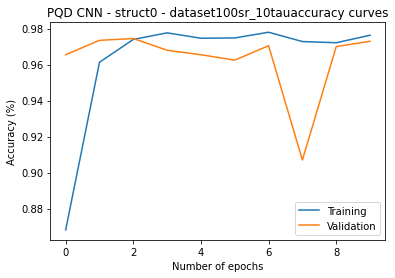

In [12]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(chart_title + " - accuracy curves")
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

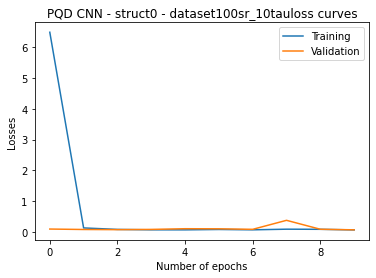

In [13]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(chart_title + " - loss curves")
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [14]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

63/63 [==============================] - 232s 3s/step - loss: 0.0657 - accuracy: 0.9745


In [15]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/' + model_title)